## Nama : Wendy Hendiana Putra
## NIM : 221351154
## Kelas : Pagi C

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Cholesterol Level,Blood Pressure,Smoking,Physical Activity,BMI,Heart Disease Risk
0,55,High,High,Yes,Low,Overweight,High
1,43,Normal,Normal,No,Moderate,Normal,Low
2,60,High,High,Yes,Low,Obese,High
3,35,Normal,Low,No,High,Normal,Low
4,50,High,High,No,Low,Overweight,Medium


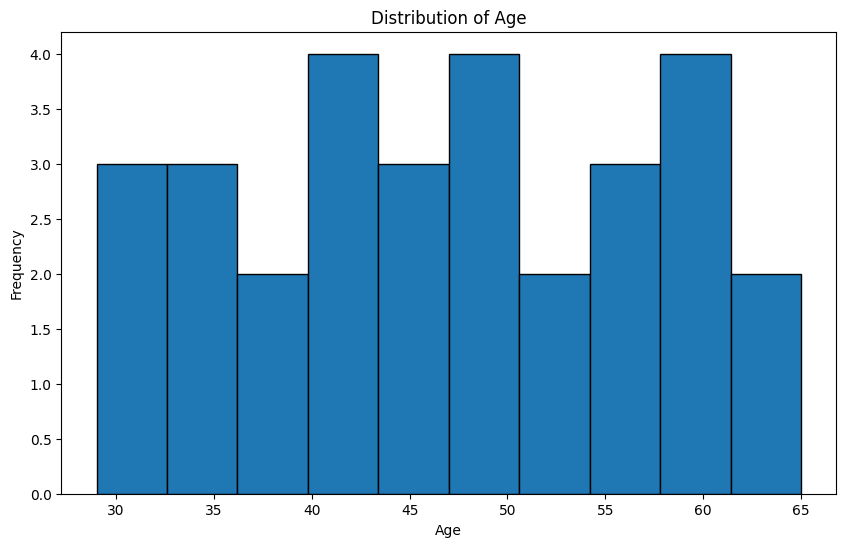

In [5]:
# Histogram of Age
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=10, edgecolor='Black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

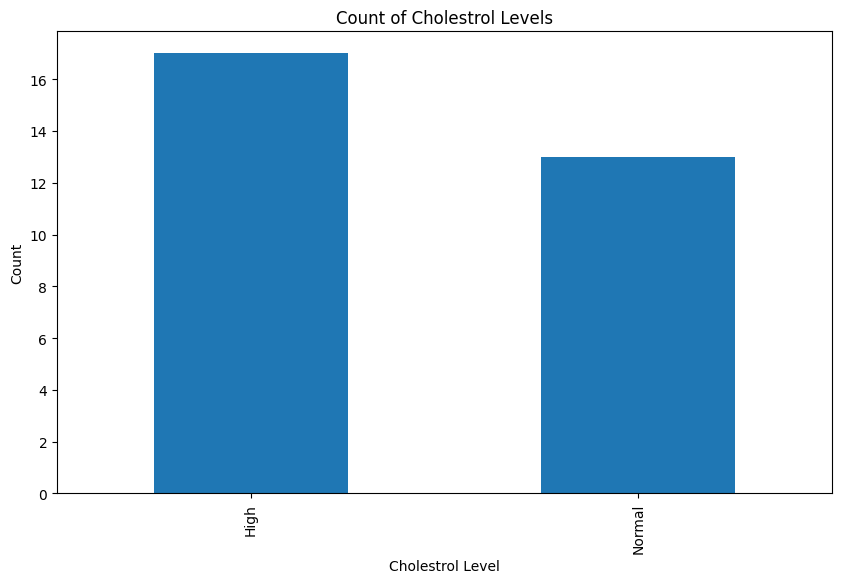

In [6]:
# Bar plot of Cholestrol Level Counts 
plt.figure(figsize=(10,6))
df['Cholesterol Level'].value_counts().plot(kind='bar')
plt.title("Count of Cholestrol Levels")
plt.xlabel("Cholestrol Level")
plt.ylabel("Count")
plt.show()

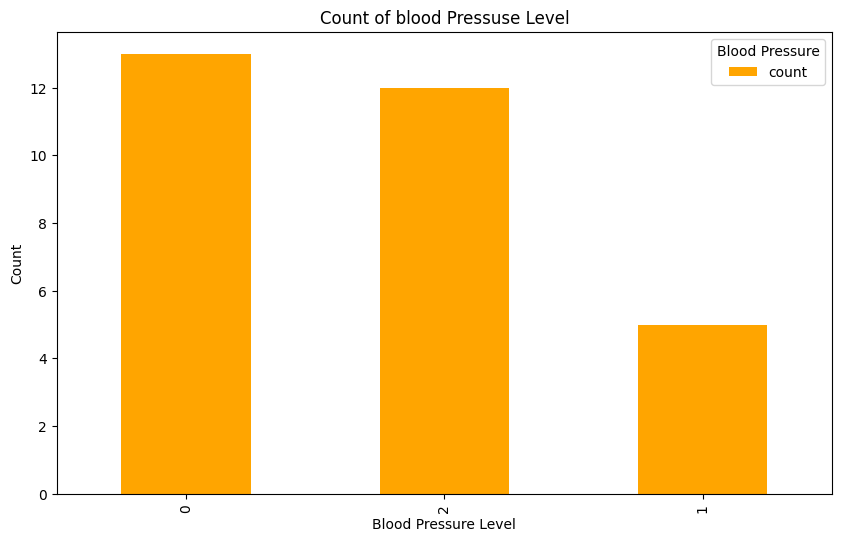

In [33]:
# Bar plot
plt.figure(figsize=(10,6))
df['Blood Pressure'].value_counts().plot(kind='bar', color='orange')
plt.title("Count of blood Pressuse Level")
plt.xlabel("Blood Pressure Level")
plt.ylabel("Count")
plt.legend(title='Blood Pressure')
plt.show()

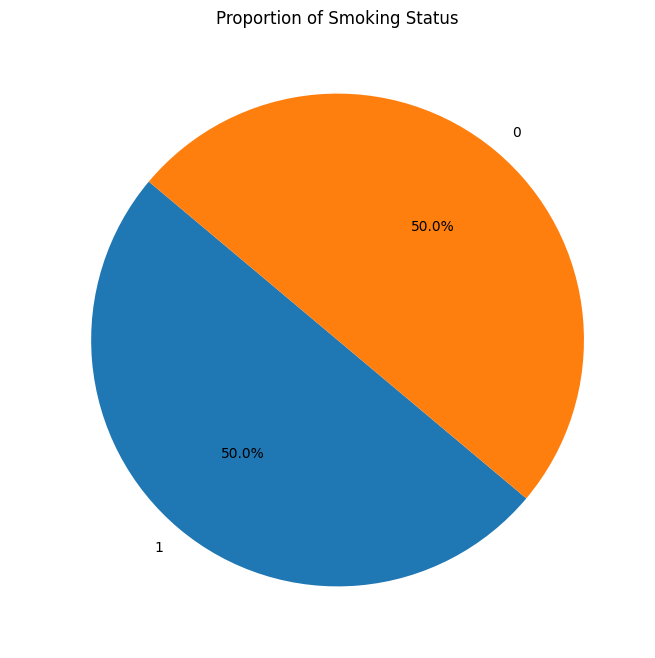

In [32]:
# Pie Chart
plt.figure(figsize=(8,8))
df['Smoking'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Smoking Status")
plt.ylabel(" ")
plt.show()

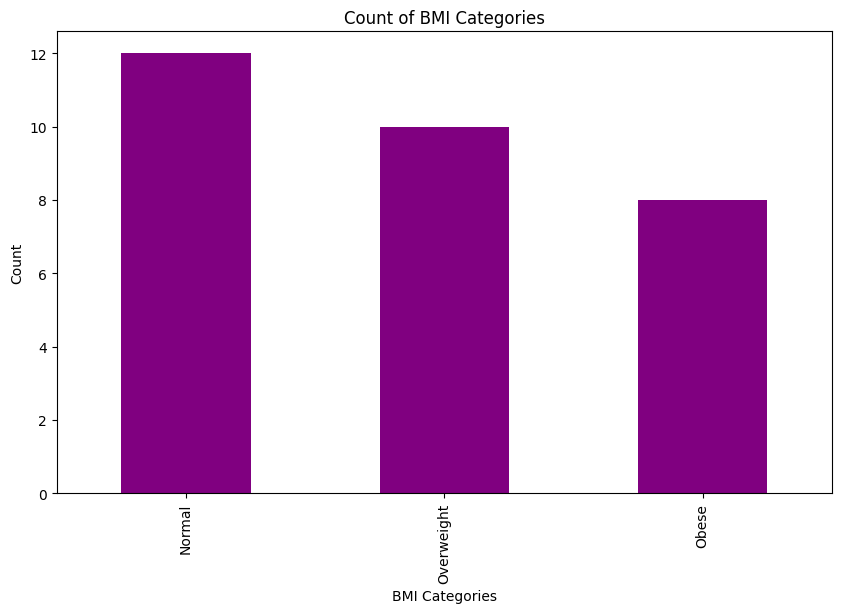

In [9]:
# COunt Plot
plt.figure(figsize=(10,6))
df['BMI'].value_counts().plot(kind='bar', color='purple')
plt.title("Count of BMI Categories")
plt.xlabel("BMI Categories")
plt.ylabel("Count")
plt.show()

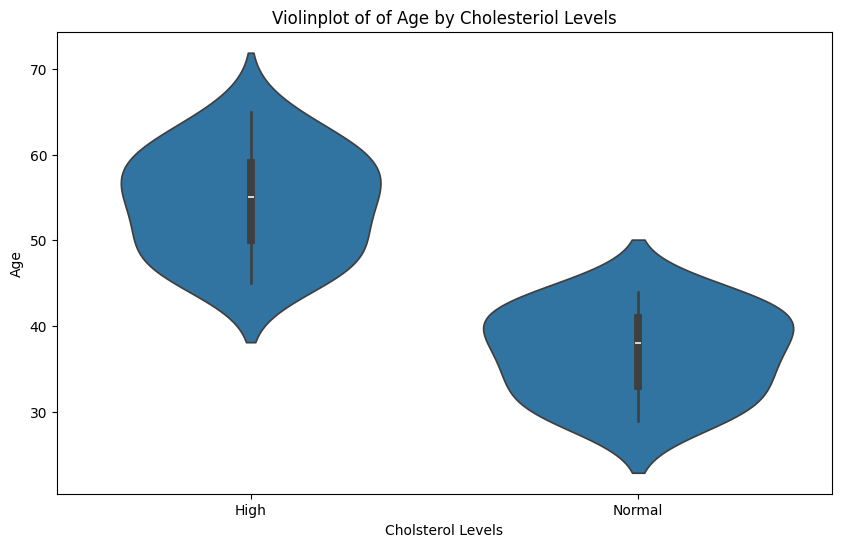

In [10]:
# Violin Plot 
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cholesterol Level', y='Age', data=df)
plt.title("Violinplot of of Age by Cholesteriol Levels")
plt.xlabel("Cholsterol Levels")
plt.ylabel("Age")
plt.show()

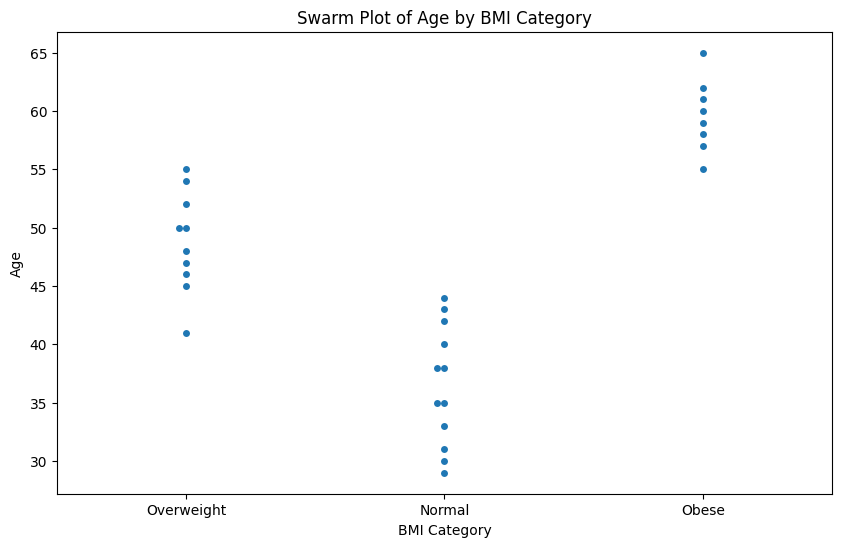

In [11]:
# Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='BMI', y='Age', data=df)
plt.title("Swarm Plot of Age by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Age")
plt.show()

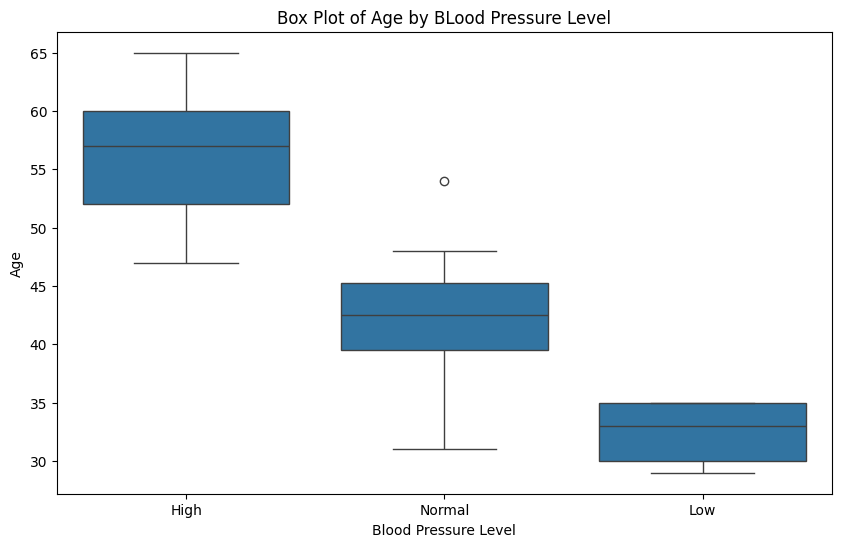

In [12]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Blood Pressure', y='Age', data=df)
plt.title("Box Plot of Age by BLood Pressure Level")
plt.xlabel("Blood Pressure Level")
plt.ylabel("Age")
plt.show()

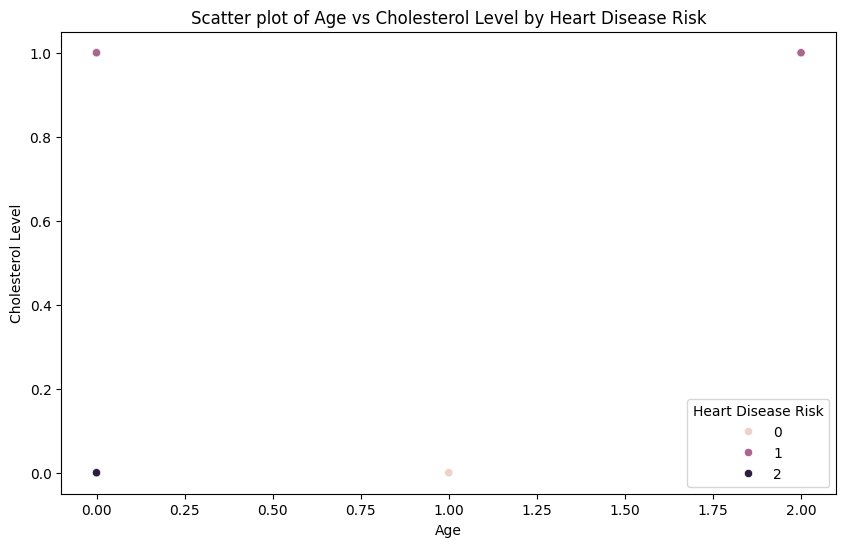

In [34]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Cholesterol Level', hue='Heart Disease Risk')
plt.title("Scatter plot of Age vs Cholesterol Level by Heart Disease Risk")
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")
plt.legend(title="Heart Disease Risk")
plt.show()

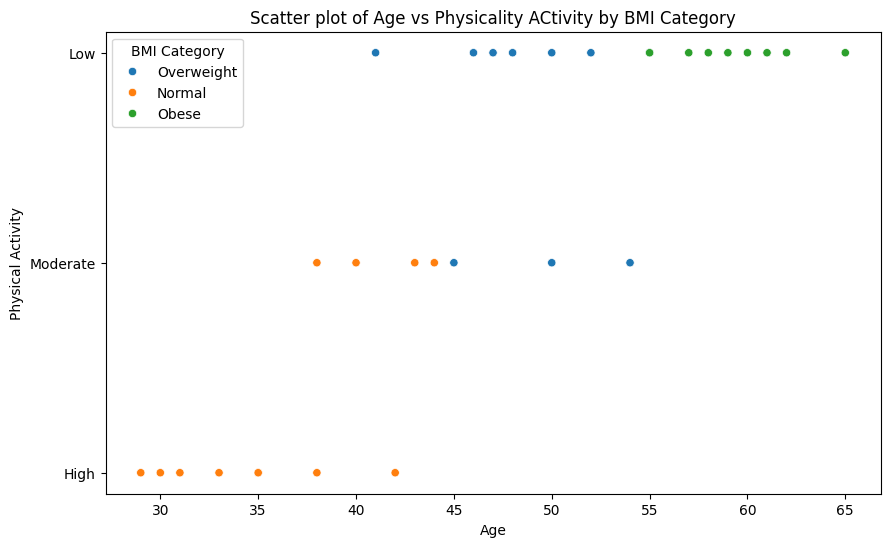

In [13]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Physical Activity', hue='BMI')
plt.title("Scatter plot of Age vs Physicality ACtivity by BMI Category")
plt.xlabel("Age")
plt.ylabel("Physical Activity")
plt.legend(title="BMI Category")
plt.show()

In [14]:
# membuat fungsi untuk mengkategorikan usia
def categorize_age(age):
    if age < 35:
        return "Young"
    elif age < 55:
        return "Middle-aged"
    else:
        return "Senior"

In [15]:
# Menerapkan fungsi pada kolom Age dan buat kolom baru 'Age Category'"
df['Age'] = df['Age'].apply(categorize_age)

In [16]:
df.head()

,Age,Cholesterol Level,Blood Pressure,Smoking,Physical Activity,BMI,Heart Disease Risk
0,Senior,High,High,Yes,Low,Overweight,High
1,Middle-aged,Normal,Normal,No,Moderate,Normal,Low
2,Senior,High,High,Yes,Low,Obese,High
3,Middle-aged,Normal,Low,No,High,Normal,Low
4,Middle-aged,High,High,No,Low,Overweight,Medium


In [17]:
# Encode semua variabe kategori
label_encoder = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoder[column] = le

In [18]:
df.head()

,Age,Cholesterol Level,Blood Pressure,Smoking,Physical Activity,BMI,Heart Disease Risk
0,1,0,0,1,1,2,0
1,0,1,2,0,2,0,1
2,1,0,0,1,1,1,0
3,0,1,1,0,0,0,1
4,0,0,0,0,1,2,2


In [19]:
# Split dataset
X = df.drop('Heart Disease Risk', axis=1)
y = df['Heart Disease Risk']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Train the C4.5
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
# Prediction
y_pred = model.predict(X_test)

In [23]:
# Simulasi new input data
new_data = pd.DataFrame({
    'Age' : [label_encoder['Age'].transform(['Middle-aged'])[0]],
    'Cholesterol Level' : (label_encoder['Cholesterol Level'].transform(['High'])[0]),
    'Blood Pressure' : (label_encoder['Blood Pressure'].transform(['High'])[0]),
    'Smoking' : [label_encoder['Smoking'].transform(['Yes'])[0]],
    'Physical Activity' : [label_encoder['Physical Activity'].transform(['Low'])[0]],
    'BMI' : [label_encoder['BMI'].transform(['Overweight'])[0]]
})

In [24]:
new_prediction = model.predict(new_data)

In [25]:
new_prediction_decoded = label_encoder['Heart Disease Risk'].inverse_transform(new_prediction)

In [26]:
new_prediction_decoded

array(['High'], dtype=object)

In [27]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [28]:
accuracy, conf_matrix

(1.0,
 array([[3, 0, 0],
        [0, 5, 0],
        [0, 0, 1]]))

<function matplotlib.pyplot.show(close=None, block=None)>

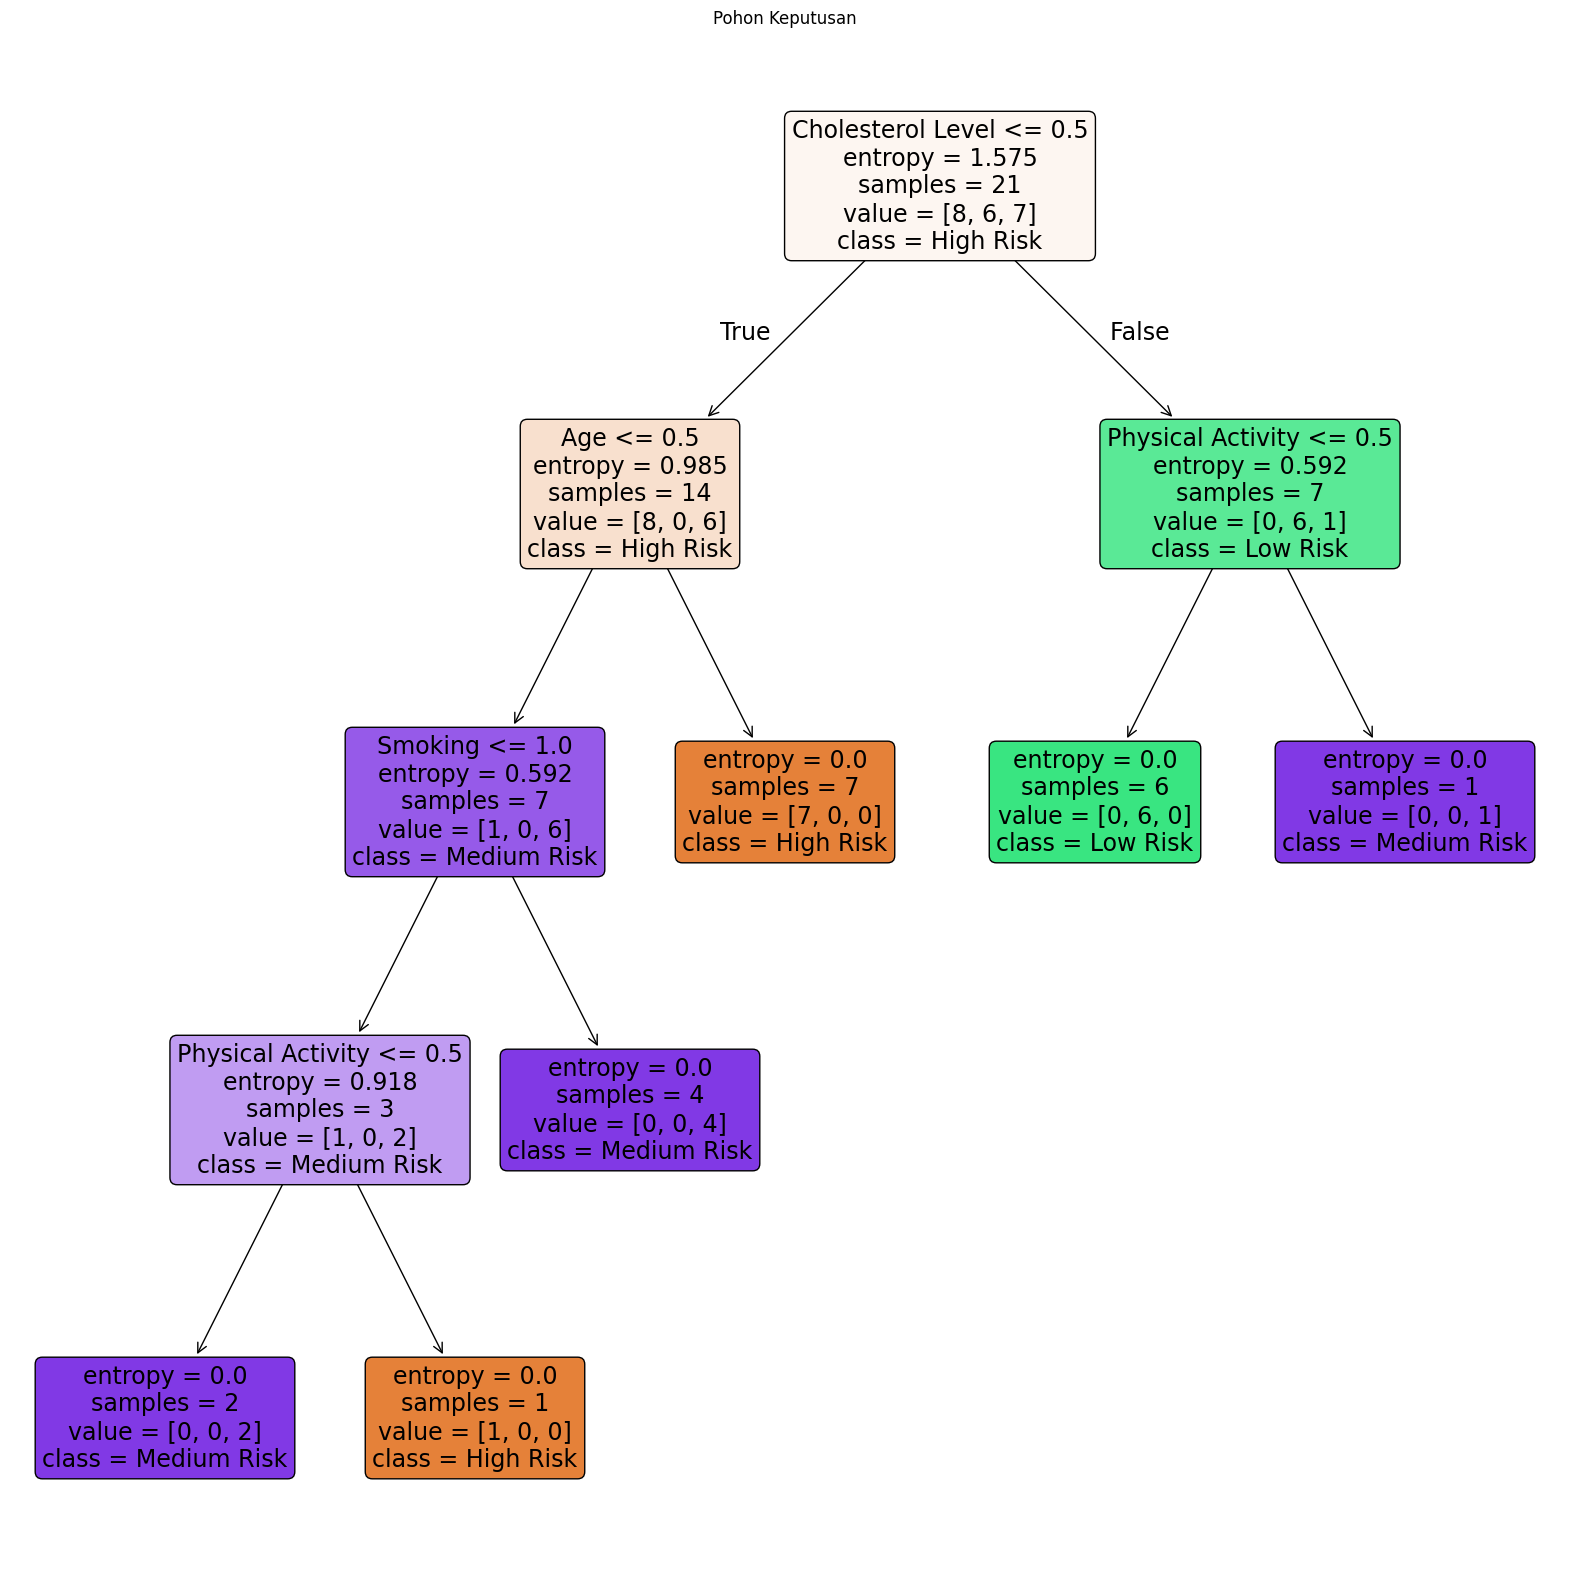

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=['Age',
                                'Cholesterol Level',
                                'Smoking',
                                'Physical Activity',
                                'BMI'], class_names=['High Risk',
                                                     'Low Risk',
                                                     'Medium Risk'],
                                                     filled=True, rounded=True)
plt.title("Pohon Keputusan")
plt.show